In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
allcounties = pd.read_csv('all_countiesby16.csv')

groupby = allcounties.groupby('geoid')

aggregate_emissions = allcounties.groupby('year')['emissions'].sum()

3096 out of 18 have 2040 < 2060 emissions


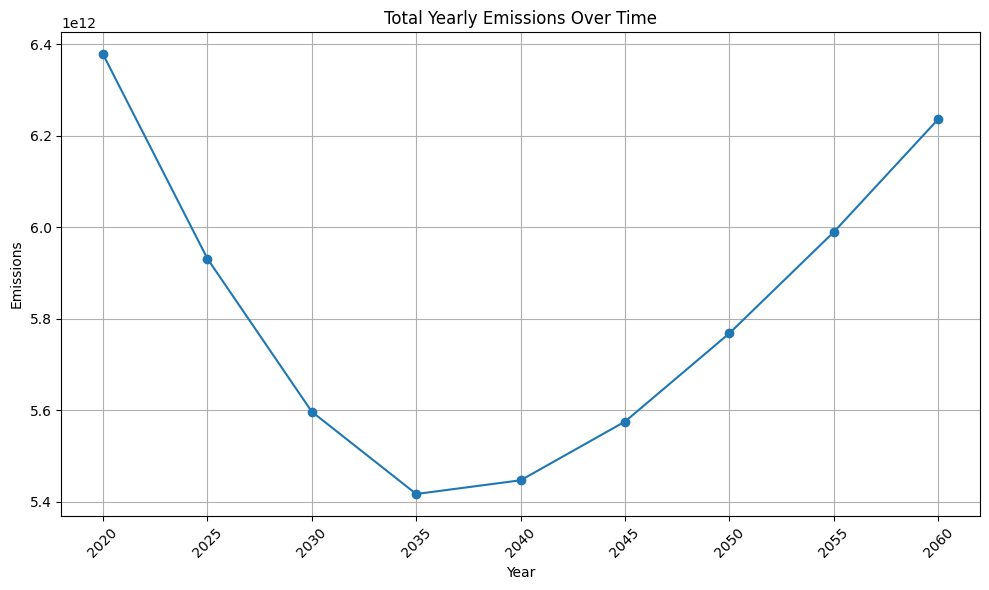

In [7]:
# In[3]:


count = 0
for name, group in groupby:
    if group[group["year"] == 2040]["emissions"].iloc[0] < group[group["year"] == 2060]["emissions"].iloc[0]:
        count += 1
    leng = len(group)

print(f"{count} out of {leng} have 2040 < 2060 emissions")


# In[2]:


plt.figure(figsize=(10, 6))
plt.plot(aggregate_emissions.index, aggregate_emissions, marker='o')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Total Yearly Emissions Over Time')
plt.xticks(aggregate_emissions.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

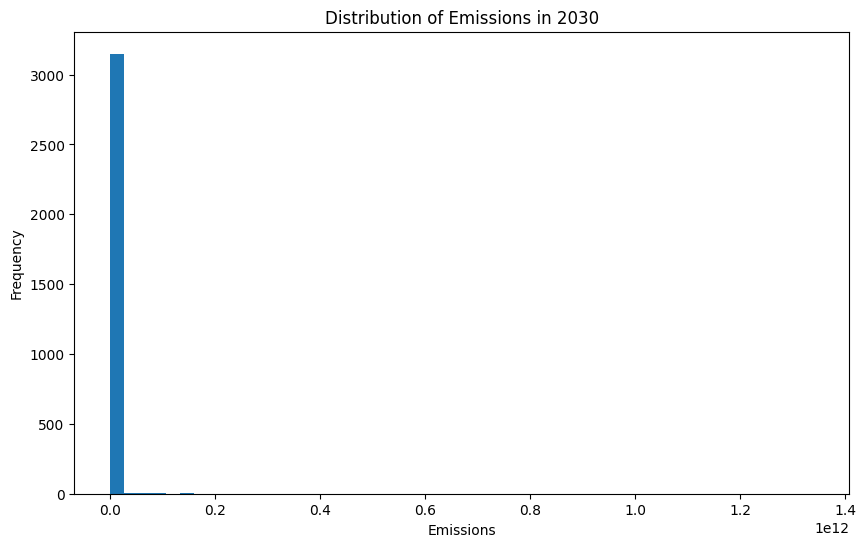

1340983174012.3


In [8]:
# In[8]:


df_2030 = allcounties[allcounties['year'] == 2030.0]
emissions_2030 = df_2030['emissions']

plt.figure(figsize=(10, 6))
plt.hist(emissions_2030, bins=50)
plt.xlabel('Emissions')
plt.ylabel('Frequency')
plt.title('Distribution of Emissions in 2030')
plt.show()


# In[9]:


print(emissions_2030.max())

1340983174012.3


<Axes: xlabel='emissions', ylabel='Count'>

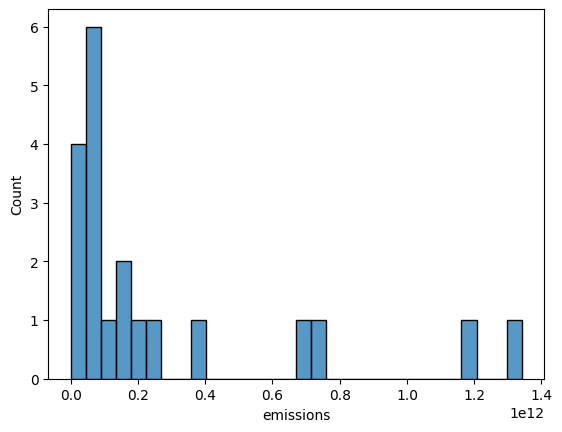

In [9]:
print(emissions_2030.max())


# In[4]:


df_2030 = allcounties[allcounties['year'] == 2030.0]
df_2030 = df_2030[df_2030['emissions'] >= 19897500]
sns.histplot(data=df_2030, x="emissions", bins=30)

       Unnamed: 0    year  geoid  pollutant     emissions           vmt  \
25452       25452  2020.0  51041       98.0  1.530517e+12  3.355266e+09   
26451       26451  2020.0  51810       98.0  1.360394e+12  2.952812e+09   
25335       25335  2020.0  51015       98.0  8.259461e+11  1.568350e+09   
26406       26406  2020.0  51760       98.0  7.955862e+11  1.753679e+09   
26118       26118  2020.0  51199       98.0  4.325876e+11  8.821259e+08   
26388       26388  2020.0  51740       98.0  2.689531e+11  5.896158e+08   
26010       26010  2020.0  51173       98.0  2.401590e+11  4.617260e+08   
26856       26856  2020.0  54005       98.0  1.662467e+11  3.614194e+08   
26865       26865  2020.0  54005       98.0  1.662467e+11  3.614194e+08   
25551       25551  2020.0  51065       98.0  1.163897e+11  2.446359e+08   

        sourcehours     vehicles  starts  idlehours  hoteld  hotelb  hotelo  \
25452  9.872161e+07  282340.2000     NaN        NaN     NaN     NaN     NaN   
26451  1.001860e

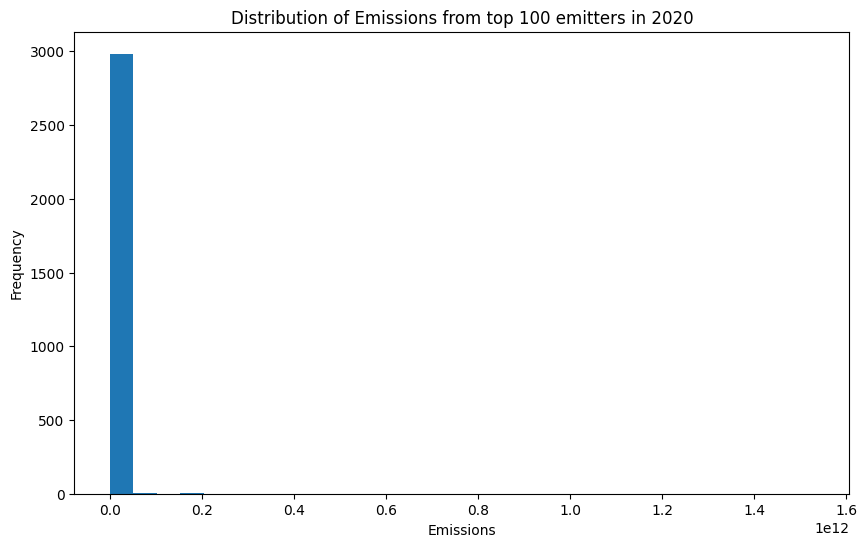

       Unnamed: 0    year  geoid  pollutant     emissions           vmt  \
25452       25452  2020.0  51041       98.0  1.530517e+12  3.355266e+09   
26451       26451  2020.0  51810       98.0  1.360394e+12  2.952812e+09   
25335       25335  2020.0  51015       98.0  8.259461e+11  1.568350e+09   
26406       26406  2020.0  51760       98.0  7.955862e+11  1.753679e+09   
26118       26118  2020.0  51199       98.0  4.325876e+11  8.821259e+08   
...           ...     ...    ...        ...           ...           ...   
8919         8919  2020.0  20179       98.0  3.107055e+04  6.127735e+07   
14553       14553  2020.0  30011       98.0  3.082170e+04  6.078764e+07   
9639         9639  2020.0  21129       98.0  3.078725e+04  6.071875e+07   
26397       26397  2020.0  51750       98.0  3.065445e+04  5.990047e+07   
18063       18063  2020.0  38033       98.0  3.061026e+04  5.023774e+07   

        sourcehours       vehicles        starts   idlehours     hoteld  \
25452  9.872161e+07  282

In [10]:
#getting top 10 emitters out of all counties
emissions_2020 = allcounties[allcounties['year'] == 2020]
top_10_2020 = emissions_2020.nlargest(10, 'emissions')
print(top_10_2020)


# In[ ]:


top_100_2020 = emissions_2020.nlargest(3000, 'emissions')
top_100_2020_em = top_100_2020['emissions']
plt.figure(figsize=(10, 6))
plt.hist(top_100_2020_em, bins=30)
plt.xlabel('Emissions')
plt.ylabel('Frequency')
plt.title('Distribution of Emissions from top 100 emitters in 2020')
plt.show()


# In[43]:


emissions_dropped_2020 = emissions_2020.drop(index=emissions_2020[emissions_2020['emissions'] >= 1e+08].index)


# In[53]:


print(top_100_2020)


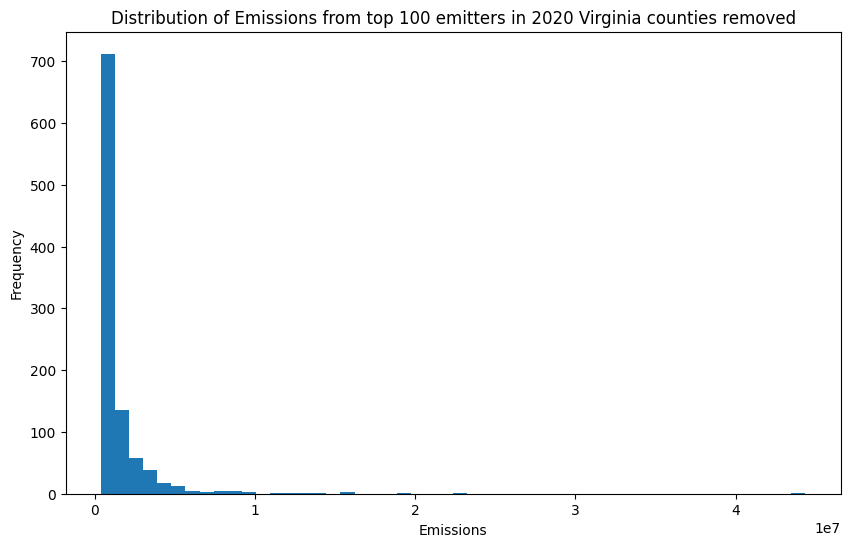

In [11]:
# In[ ]:


top_100_2020 = emissions_dropped_2020.nlargest(1000, 'emissions')
top_100_2020_em = top_100_2020['emissions']
plt.figure(figsize=(10, 6))
plt.hist(top_100_2020_em, bins=50)
plt.xlabel('Emissions')
plt.ylabel('Frequency')
plt.title('Distribution of Emissions from top 100 emitters in 2020 Virginia counties removed')
plt.show()


# In[11]:


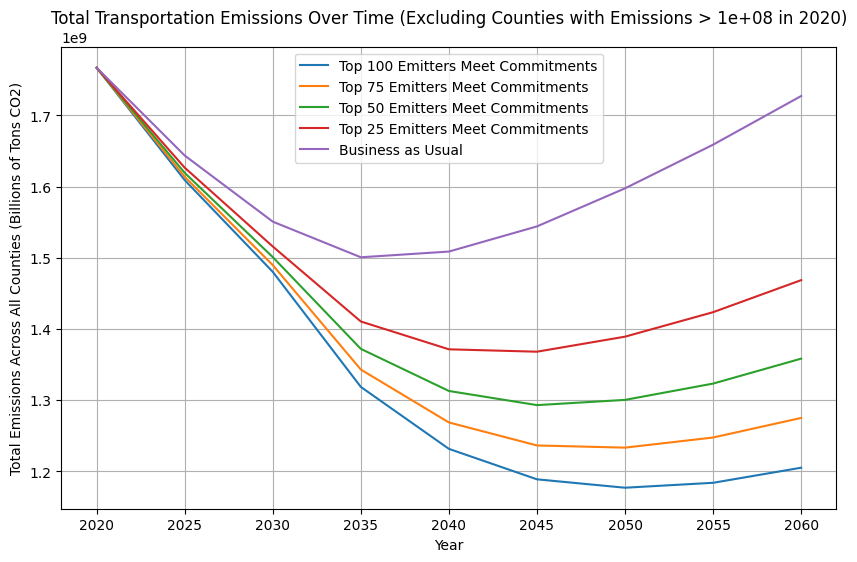

In [12]:
#dataframe restricted to counties in 2020
def df_2020(df):
    return df[df['year'] == 2020.0]

# Identify the counties with emissions greater than n in 2020
def remove_counties(df, n):
    counties_to_remove = df_2020(df)[df_2020(df)['emissions'] > n]['geoid']
    return df[~df['geoid'].isin(counties_to_remove)]

# Identify the top 100 counties based on emissions in 2020
#df is dataframe of counties
#k is number of counties by emissions
def top_x_counties(df, k):
    return df_2020(df).nlargest(k, 'emissions')['geoid']

# Calculate the reduced emissions for the top k counties based on the 2020 emissions
#df is the base dataframe
#n is the highest level of emissions you want to include (for cleaning)
#k is the number of top counties that will abide by emissions rules
#p is the emissions reduction each year between 2020 and 2030
#q is the emissions reduction each year between 2030 and 2060
def emissions_scenario(df, n, k, p, q):
    df2 = remove_counties(df, n)
    for county in top_x_counties(df2, k):
        emissions_2020 = df2.loc[(df['geoid'] == county) & (df2['year'] == 2020.0), 'emissions'].values[0]
        df2.loc[(df2['geoid'] == county) & (df2['year'] == 2025.0), 'emissions'] = emissions_2020 * ((1-p))
        df2.loc[(df2['geoid'] == county) & (df2['year'] == 2030.0), 'emissions'] = emissions_2020 * ((1-p)**2)
        df2.loc[(df2['geoid'] == county) & (df2['year'] == 2035.0), 'emissions'] = emissions_2020 * ((1-p)**2) * ((1-q))
        df2.loc[(df2['geoid'] == county) & (df2['year'] == 2040.0), 'emissions'] = emissions_2020 * ((1-p)**2) * ((1-q)**2)
        df2.loc[(df2['geoid'] == county) & (df2['year'] == 2045.0), 'emissions'] = emissions_2020 * ((1-p)**2) * ((1-q)**3)
        df2.loc[(df2['geoid'] == county) & (df2['year'] == 2050.0), 'emissions'] = emissions_2020 * ((1-p)**2) * ((1-q)**4)
        df2.loc[(df2['geoid'] == county) & (df2['year'] == 2055.0), 'emissions'] = emissions_2020 * ((1-p)**2) * ((1-q)**5)
        df2.loc[(df2['geoid'] == county) & (df2['year'] == 2060.0), 'emissions'] = emissions_2020 * ((1-p)**2) * ((1-q)**6)
    return df2

# Group by year and sum the emissions to get the total emissions
#Warning: This sums up all numbers in each column so don't expect other information to make sense (example dataframe)
def total_emissions(df):
    return df.groupby('year').sum()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831)))['emissions'], label = 'Top 100 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 75, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 75, .1294, .2831)))['emissions'], label = 'Top 75 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 50, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 50, .1294, .2831)))['emissions'], label = 'Top 50 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 25, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 25, .1294, .2831)))['emissions'], label = 'Top 25 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 0, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 0, .1294, .2831)))['emissions'], label = 'Business as Usual')
plt.xlabel('Year')
plt.ylabel('Total Emissions Across All Counties (Billions of Tons CO2)')
plt.title('Total Transportation Emissions Over Time (Excluding Counties with Emissions > 1e+08 in 2020)')
plt.xticks(total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831)).index)
plt.legend()
plt.grid(True)
plt.show()


# In[12]:

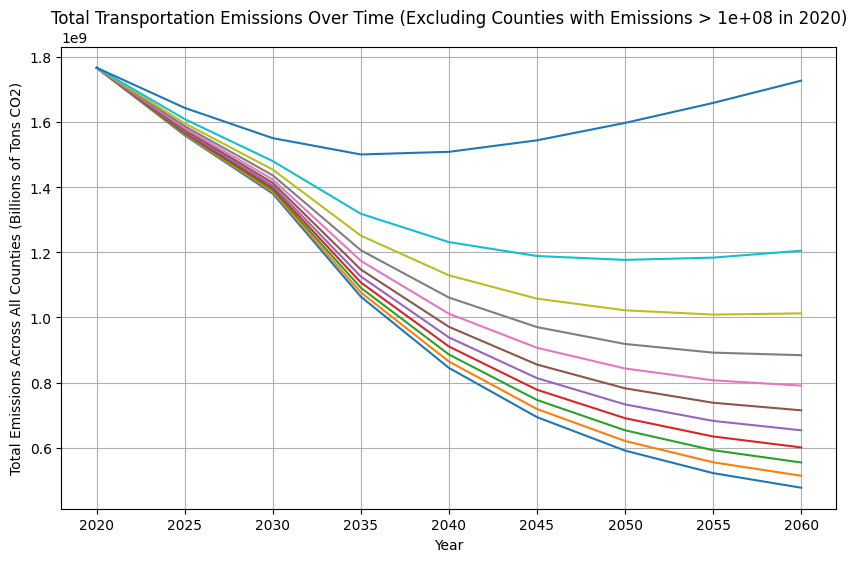

In [13]:

plt.figure(figsize=(10, 6))
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1000, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1000, .1294, .2831)))['emissions'], label = 'Top 100 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 900, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 900, .1294, .2831)))['emissions'], label = 'Top 75 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 800, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 800, .1294, .2831)))['emissions'], label = 'Top 50 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 700, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 700, .1294, .2831)))['emissions'], label = 'Top 25 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 600, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 600, .1294, .2831)))['emissions'], label = 'Business as Usual')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 500, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 500, .1294, .2831)))['emissions'], label = 'Top 100 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 400, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 400, .1294, .2831)))['emissions'], label = 'Top 75 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 300, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 300, .1294, .2831)))['emissions'], label = 'Top 50 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 200, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 200, .1294, .2831)))['emissions'], label = 'Top 25 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831)))['emissions'], label = 'Business as Usual')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 0, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 0, .1294, .2831)))['emissions'], label = 'Business as Usual')

plt.xlabel('Year')
plt.ylabel('Total Emissions Across All Counties (Billions of Tons CO2)')
plt.title('Total Transportation Emissions Over Time (Excluding Counties with Emissions > 1e+08 in 2020)')
plt.xticks(total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831)).index)
#plt.legend()
plt.grid(True)
plt.show()


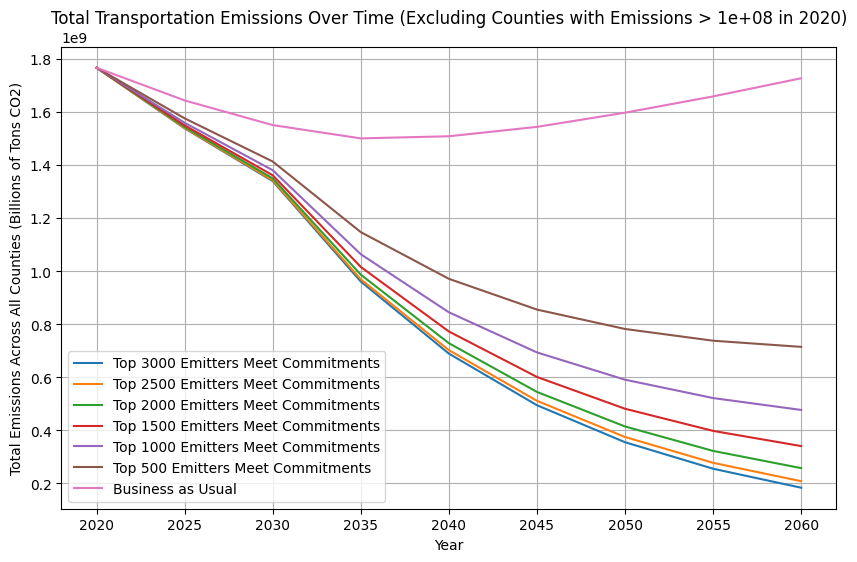

In [14]:
plt.figure(figsize=(10, 6))
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 3000, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 3000, .1294, .2831)))['emissions'], label = 'Top 3000 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 2500, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 2500, .1294, .2831)))['emissions'], label = 'Top 2500 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 2000, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 2000, .1294, .2831)))['emissions'], label = 'Top 2000 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1500, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1500, .1294, .2831)))['emissions'], label = 'Top 1500 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1000, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1000, .1294, .2831)))['emissions'], label = 'Top 1000 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 500, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 500, .1294, .2831)))['emissions'], label = 'Top 500 Emitters Meet Commitments')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 0, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 0, .1294, .2831)))['emissions'], label = 'Business as Usual')

plt.xlabel('Year')
plt.ylabel('Total Emissions Across All Counties (Billions of Tons CO2)')
plt.title('Total Transportation Emissions Over Time (Excluding Counties with Emissions > 1e+08 in 2020)')
plt.xticks(total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831)).index)
plt.legend()
plt.grid(True)
plt.show()

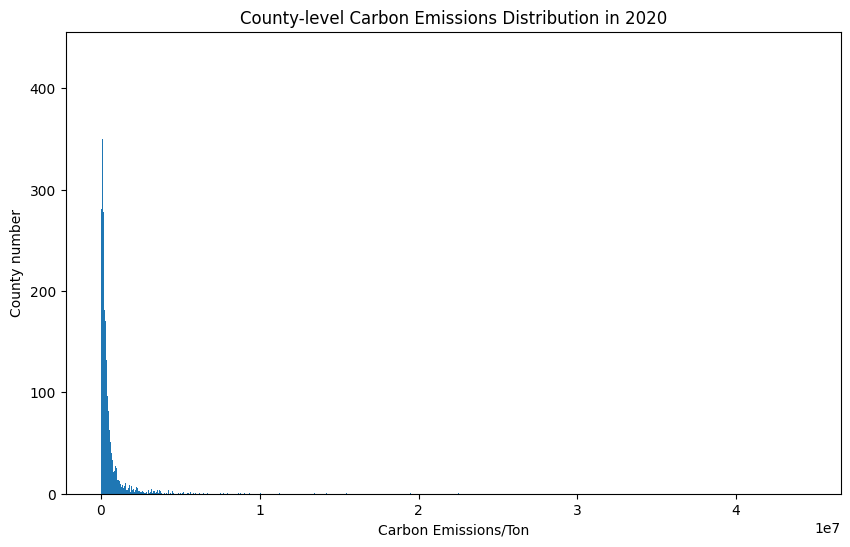

In [22]:
# In[7]:


df_2020_plot = remove_counties(allcounties, 1e+08) 
df_2020_plot = df_2020_plot[df_2020_plot['year'] == 2020.0]
emissions_2020 = df_2020_plot['emissions']

plt.figure(figsize=(10, 6))
plt.hist(emissions_2020, bins=1000)
plt.xlabel('Carbon Emissions/Ton')
plt.ylabel('County number')
plt.title('County-level Carbon Emissions Distribution in 2020')
plt.show()


(-18630.585719198592, 263684.9087134064)

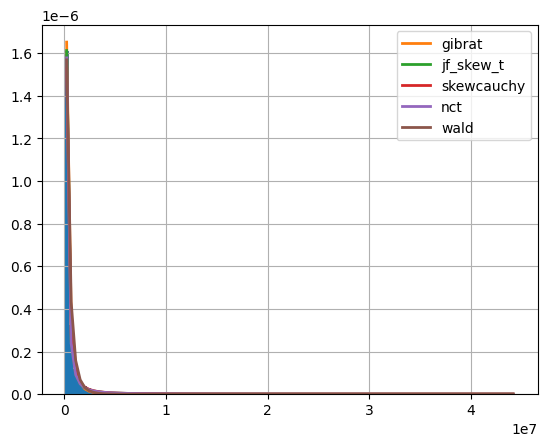

In [18]:
# In[5]:


#plotting distribution
from fitter import Fitter
f = Fitter(df_2020_plot['emissions'])
f.fit()
f.summary()


# In[8]:


from scipy import stats
from scipy.stats import gibrat
gibrat.fit(df_2020_plot['emissions'])


# In[6]:

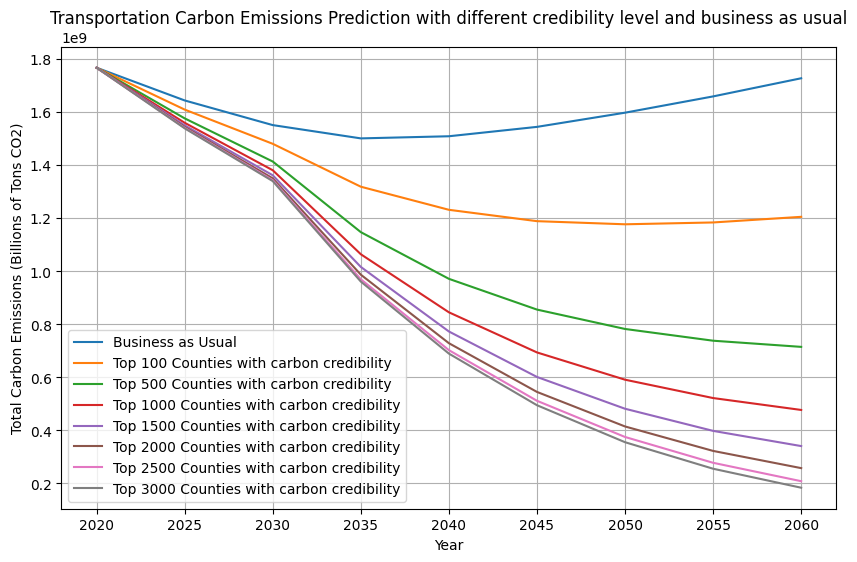

In [20]:
# In[13]:


plt.figure(figsize=(10, 6))
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 0, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 0, .1294, .2831)))['emissions'], label = 'Business as Usual')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831)))['emissions'], label = 'Top 100 Counties with carbon credibility')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 500, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 500, .1294, .2831)))['emissions'], label = 'Top 500 Counties with carbon credibility')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1000, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1000, .1294, .2831)))['emissions'], label = 'Top 1000 Counties with carbon credibility')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1500, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 1500, .1294, .2831)))['emissions'], label = 'Top 1500 Counties with carbon credibility')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 2000, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 2000, .1294, .2831)))['emissions'], label = 'Top 2000 Counties with carbon credibility')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 2500, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 2500, .1294, .2831)))['emissions'], label = 'Top 2500 Counties with carbon credibility')
plt.plot((total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 3000, .1294, .2831))).index, (total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 3000, .1294, .2831)))['emissions'], label = 'Top 3000 Counties with carbon credibility')

plt.xlabel('Year')
plt.ylabel('Total Carbon Emissions (Billions of Tons CO2)')
plt.title('Transportation Carbon Emissions Prediction with different credibility level and business as usual')
plt.xticks(total_emissions(emissions_scenario(allcounties.copy(), 1e+08, 100, .1294, .2831)).index)
plt.legend()
plt.grid(True)
plt.show()

